# MODELACIÓN PARA MAXIMIZAR RECUPERACIÓN DE AGUA EN MOLIENDA SAG








29 de marzo de 2023


## EQUIPO DE TRABAJO
A continuación, se describen las responsabilidades de cada cargo: 

- LÍDER DEL EQUIPO - Lucas Pereyra: Encargado de la organización y delegación de tareas del equipo, además, supervisará si se están cumpliendo las tareas designadas.
- INGENIERO DE DATOS - Jorge Allende: Responsable de facilitar el tratamiento de los datos realizando un análisis de estos, con lo cual es posible encontrar tendencias y desarrollar algoritmos para lograr que los datos sin procesar sean más útiles. 
- INGENIERO DE ANÁLISIS DE DATOS - Gonzalo Herrera: Responsable de seleccionar los atributos que se utilizarán en el modelo, a partir del análisis de la distribución y correlación entre las variables.
- INGENIERO DE MODELAMIENTO - Fernando Guerrero: Encargado de seleccionar los modelos que se pondrán a prueba y las métricas de evaluación que se utilizarán.
- DOCUMENTADOR - Todos: Recolectar y ordenar la información generada por cada integrante del equipo.


## INTRODUCCIÓN
En Chile, la minería es el rubro que concentra la mayor producción del país, llegando a representar casi un 95% de esta. Si bien genera grandes beneficios, también tiene algunos costos energéticos y puede verse afectada por la escasez hídrica que actualmente sufre el país. Por esto, el uso eficiente de este recurso en los procesos mineros es de vital importancia, ya que la cantidad de agua que se utiliza durante el proceso de concentración es bastante grande y su optimización puede ayudar económica y ambientalmente a la empresa. 

El proceso minero se puede dividir en tres etapas:

- Reducción de tamaño: Abarca la etapa de chancado y molienda, donde el objetivo es liberar el mineral que se encuentra dentro de la roca (donde centraremos el análisis de este proyecto).
- Concentración: Se refiere a la etapa de flotación, donde se separa el mineral de interés del resto.
- Etapa de espesamiento: La descarga de la celda de flotación, con el mineral de desecho es llevada a un espesador donde el material sólido se flocula y decanta permitiendo la recuperación de agua en la parte superior de este. El agua obtenida de esta etapa se recircula a otras partes del proceso.


## PROBLEMA
El volumen de material que entra al proceso minero puede llegar a ser de miles de toneladas, y por lo mismo, la cantidad de agua necesaria para procesarlos, alcanza una magnitud aún mayor. El agua utilizada, si no es bien aprovechada en las primeras etapas del proceso, podría generar en ciertas épocas del año, paradas no deseadas, concurriendo en la pérdida de procesamiento y ganancias de la minera.


## SITUACIÓN ACTUAL
Actualmente las decisiones que se toman para controlar el proceso se basan en la información de los operadores, quienes a partir de la experiencia en su cargo, manejan las variables para obtener el mejor resultado. Sin embargo, no hay protocolos definidos que entreguen un plan de acción para controlar el proceso de manera eficiente. 


## HIPÓTESIS 
- Si es posible modelar la optimización del uso de los recursos hídricos a partir de un modelo de machine learning, entonces, es posible cuantificar la eficiencia del proceso y definir parámetros críticos.



## OBJETIVO
- Modelar la optimización del uso de los recursos hídricos para maximizar la eficiencia de los procesos y establecer las variables más importantes que permitan la elaboración de un procedimiento para el operador.


 


## PREPARACIÓN DEL AMBIENTE DE TRABAJO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as linreg
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
import pickle
from func import *
import warnings
warnings.simplefilter("ignore")

## ORIGEN DE DATOS Y PREPROCESAMIENTO
Respecto al origen de datos, estos son alojados en sistemas transaccionales de la compañía minera, que gracias al avance tecnológico de las herramientas en uso, es posible ir recopilando toda la información proveniente de la operación misma.
En esta ocasión se opta por una muestra debido a que se puede contabilizar fácilmente, contemplando un periodo de 3 meses de trabajo operacional de un molino SAG, el que almacena información de manera periódica en un sistema PI permitiendo la posibilidad de ser consumida a través de la descarga directa en un formato csv o texto plano.

El tipo de dato absoluto que se encuentra es de tipo Float y es debido a la precisión necesaria utilizada en las operaciones.

Por otro lado, el dataset utilizado contiene un total 283 columnas, algunas incluyen duplicidad de registros debido a que muchos de ellos son medidos por sensores externos adicionales a los internos del dispositivo y es en base a esto y al uso del dispositivo en específico SAG5, queda reducido a sólo 15
Por último, dicha data contiene registros que no aportan al objetivo por ende se eliminan para dejar lo más depurada esta información n.

In [2]:
df = pd.read_excel("Raw data act junio-22.xlsx", header = [1])
df

,2022-05-31 23:55:00,Pot_SAG4,Pres_SAG4,rpm_SAG4,Cp_SAG4,Tph_SAG4,Peb_SAG4,Peb_Rec_SAG4,Fino_SAG4,Intermedio_SAG4,...,Run_SAG4,Run_SAG5,Run_MB1,Run_MB2,Run_MB3,Run_MB4,Run_MB5,Run_MB6,Run_MB7,Run_MB8
0,5 m,310-JI-0601.PV,310-PI-0602.PV,310-SIC-0605.PV,310-FFIC-0011.PV,240-WIC-6917.PV,330-WI-012.PV,330-WI-5287.PV,FINOS-VISIOROCK-LS.RM,MEDIOS-VISIOROCK-LS.RM,...,310-XL-0604RUN.DI,EOGP01.1310-MS-002.RUN,310-MB-001CMD.FB1,310-MB-002CMD.FB1,310-MB-003CMD.FB1,els.310_mb_004.run,EOGP01.1310-MB-005.RUN,EOGP01.1310-MB-006.RUN,EOGP01.1310-MB-007.RUN,EOGP01.1310-MB-008.RUN
1,NaN,310-JI-0601.PV,310-PI-0602.PV,310-SIC-0605.PV,310-FFIC-0011.PV,240-WIC-6917.PV,330-WI-012.PV,330-WI-5287.PV,FINOS-VISIOROCK-LS.RM,MEDIOS-VISIOROCK-LS.RM,...,310-XL-0604RUN.DI,EOGP01.1310-MS-002.RUN,310-MB-001CMD.FB1,310-MB-002CMD.FB1,310-MB-003CMD.FB1,els.310_mb_004.run,EOGP01.1310-MB-005.RUN,EOGP01.1310-MB-006.RUN,EOGP01.1310-MB-007.RUN,EOGP01.1310-MB-008.RUN
2,Timestamp,310-JI-0601.PV - Average,310-PI-0602.PV - Average,310-SIC-0605.PV - Average,310-FFIC-0011.PV - Average,240-WIC-6917.PV - Average,330-WI-012.PV - Average,330-WI-5287.PV - Average,FINOS-VISIOROCK-LS.RM - Average,MEDIOS-VISIOROCK-LS.RM - Average,...,310-XL-0604RUN.DI - Average,EOGP01.1310-MS-002.RUN - Average,310-MB-001CMD.FB1 - Average,310-MB-002CMD.FB1 - Average,310-MB-003CMD.FB1 - Average,els.310_mb_004.run - Average,EOGP01.1310-MB-005.RUN - Average,EOGP01.1310-MB-006.RUN - Average,EOGP01.1310-MB-007.RUN - Average,EOGP01.1310-MB-008.RUN - Average
3,2022-03-31 12:00:00,10227.03,5380.24,8.2,71.64,4434.29,672.8,434.29,80.33,13.49,...,1,1,1,1,0,1,1,1,1,1
4,2022-03-31 12:05:00,10754.61,5377.25,8.33,71.01,4380.94,679.85,435.79,81.09,13.35,...,1,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20014,2022-06-08 23:35:00,15899.3,5359.57,9.15,68.02,3765.2,263.2,9.33,74.07,15.06,...,1,1,1,1,1,0,1,1,1,1
20015,2022-06-08 23:40:00,15858.65,5352.91,9.15,68.1,3789.74,263.67,8.28,73.61,14.7,...,1,1,1,1,1,0,1,1,1,1
20016,2022-06-08 23:45:00,15858.12,5354.38,9.15,67.86,3729.72,276.86,9.85,74.22,14.48,...,1,1,1,1,1,0,1,1,1,1
20017,2022-06-08 23:50:00,15760.33,5334.34,9.15,68.06,3750.79,270.78,10.83,74.88,14.38,...,1,1,1,1,1,0,1,1,1,1


In [3]:
df.rename(columns = {"2022-05-31 23:55:00" : "Fecha"}, inplace=True)

Primer filtro para seleccionar las variables del equipo SAG5

In [4]:
df_sag5 = df.loc[3:, 'Pot_SAG5':'SAG5_F80'].reset_index(drop=True)
df_sag5

,Pot_SAG5,Pres_SAG5,rpm_SAG5,Cp_SAG5,Tph_SAG5,Peb_SAG5,Peb_Rec_SAG5,Fino_SAG5,Intermedio_SAG5,Grueso_SAG5,...,Vel_FE21,Pad1_FE_SAG5,Pad2_FE_SAG5,Pad3_FE_SAG5,Pad4_FE_SAG5,Pad1_DE_SAG5,Pad2_DE_SAG5,Pad3_DE_SAG5,Pad4_DE_SAG5,SAG5_F80
0,16459.8,6400.84,8.62,68.66,8232.92,581.75,770.81,76.22,16.56,7.21,...,80.73,4112.68,4112.68,4112.68,4112.68,4112.68,4112.68,4112.68,4112.68,4112.68
1,16450.24,6385.75,8.6,68.57,8199.92,531.05,766.72,75.75,16.9,7.27,...,80.64,4132.34,4132.34,4132.34,4132.34,4132.34,4132.34,4132.34,4132.34,4132.34
2,16334.59,6392.67,8.58,68.77,8198.26,567.51,765.5,76.84,16.32,7.01,...,80.68,4086.69,4086.69,4086.69,4086.69,4086.69,4086.69,4086.69,4086.69,4086.69
3,16298.45,6387.79,8.56,68.62,8209.09,549.65,761.9,75.45,17.52,7.01,...,80.65,4104.58,4104.58,4104.58,4104.58,4104.58,4104.58,4104.58,4104.58,4104.58
4,16360.03,6392.99,8.56,68.7,8147.28,565.66,759.67,72.99,18.5,8.55,...,80.76,4084.01,4084.01,4084.01,4084.01,4084.01,4084.01,4084.01,4084.01,4084.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20011,14182,6248.44,7.7,64.87,7159.6,392.93,403.65,84.34,10.24,5.39,...,33.46,4094.47,4094.47,4094.47,4094.47,4094.47,4094.47,4094.47,4094.47,4094.47
20012,14279.6,6261.13,7.7,64.69,7226.09,399.99,405.85,84.42,10.5,5.08,...,33.42,4161.61,4161.61,4161.61,4161.61,4161.61,4161.61,4161.61,4161.61,4161.61
20013,14256.6,6264.52,7.7,64.58,7169.32,411.18,407.17,85.03,10.61,4.38,...,33.37,4159.66,4159.66,4159.66,4159.66,4159.66,4159.66,4159.66,4159.66,4159.66
20014,14278.3,6255.63,7.7,64.68,7162.36,395.24,399.3,85.18,10.74,4.09,...,33.38,4104.93,4104.93,4104.93,4104.93,4104.93,4104.93,4104.93,4104.93,4104.93


Revision de columnas

In [5]:
df_sag5.columns

Index(['Pot_SAG5', 'Pres_SAG5', 'rpm_SAG5', 'Cp_SAG5', 'Tph_SAG5', 'Peb_SAG5',
       'Peb_Rec_SAG5', 'Fino_SAG5', 'Intermedio_SAG5', 'Grueso_SAG5',
       'Impactos_Criticos_SAG5', 'Impactos_stand_SAG5',
       'Impac_crit_SAG5_Impfinder', 'Impac_std_SAG5_Impfinder', 'HH_pres_SAG5',
       'HH_Tph_SAG5', 'LL_Tph_SAG5', 'HH_rpm_SAG5', 'LL_rpm_SAG5',
       'HH_Cp_SAG5', 'LL_Cp_SAG5', 'Agua_SAG5', 'Vel_FE14', 'Vel_FE15',
       'Vel_FE16', 'Vel_FE17', 'Vel_FE18', 'Vel_FE19', 'Vel_FE20', 'Vel_FE21',
       'Pad1_FE_SAG5', 'Pad2_FE_SAG5', 'Pad3_FE_SAG5', 'Pad4_FE_SAG5',
       'Pad1_DE_SAG5', 'Pad2_DE_SAG5', 'Pad3_DE_SAG5', 'Pad4_DE_SAG5',
       'SAG5_F80'],
      dtype='object')

Se eliminan las variables que se consideran que no aportan valor, puesto que tienen solo datos repetidos o corresponden a sensores en desuso

In [6]:
df_sag5 = df_sag5.drop(['Pad1_FE_SAG5', 'Pad2_FE_SAG5', 'Pad3_FE_SAG5', 'Pad4_FE_SAG5',
'Pad1_DE_SAG5', 'Pad2_DE_SAG5', 'Pad3_DE_SAG5', 'Pad4_DE_SAG5',
'Vel_FE14', 'Vel_FE15', 'Vel_FE16', 'Vel_FE17', 'Vel_FE18', 
'Vel_FE19', 'Vel_FE20', 'Vel_FE21','HH_pres_SAG5',
'HH_Tph_SAG5', 'LL_Tph_SAG5', 'HH_rpm_SAG5', 'LL_rpm_SAG5',
'HH_Cp_SAG5', 'LL_Cp_SAG5', 'SAG5_F80'], axis=1)

In [7]:
df_sag5=df_sag5.replace(',', '.',regex=True).astype(float)

Luego se revisa si existen valores nulos.

In [8]:
df_sag5.isnull().sum()

Pot_SAG5                     0
Pres_SAG5                    0
rpm_SAG5                     0
Cp_SAG5                      0
Tph_SAG5                     0
Peb_SAG5                     0
Peb_Rec_SAG5                 0
Fino_SAG5                    0
Intermedio_SAG5              0
Grueso_SAG5                  0
Impactos_Criticos_SAG5       0
Impactos_stand_SAG5          0
Impac_crit_SAG5_Impfinder    0
Impac_std_SAG5_Impfinder     0
Agua_SAG5                    0
dtype: int64

### ANÁLISIS DESCRIPTIVO

Etapa que permite entender los datos y familiarizarse con ellos, además de la eliminación de variables poco relevantes. El entendimiento se logrará mediante la aplicación de distintas herramientas estadísticas las cuales se describen a continuación:

Inspección de datos perdidos: Al momento de analizar la data perdida, se pudo observar que no se encontraron datos perdidos.

Medidas de tendencia central: Nos permiten conocer, a priori, el punto central de la distribución de los datos de cada atributo, además de las magnitudes asociadas. Se utilizará:

    Promedio
    Moda

Medidas de dispersión: Parámetros esenciales que permiten cuantificar la dispersión de cada atributo respecto a la tendencia central. Además, nos permite 
identificar variabilidad o ruido en la variable de estudio. Se utilizará:

    Desviación estándar
    Varianza
    Gráficos de dispersión.

Distribución de probabilidad: Se estudiará la distribución de los datos de cada variables y se llevará a cabo mediante la generación de histogramas.

Matriz de correlaciones: Permite entender la correlación entre las múltiples variables involucradas en el proceso. Se estudiará mediante la generación de heatmap.



Se aplica un .describe() al dataframe a evaluar para obtener diferentes estadísticas que nos permitirán conocer numericamente nuestras variables.

In [9]:
df_sag5.describe()

,Pot_SAG5,Pres_SAG5,rpm_SAG5,Cp_SAG5,Tph_SAG5,Peb_SAG5,Peb_Rec_SAG5,Fino_SAG5,Intermedio_SAG5,Grueso_SAG5,Impactos_Criticos_SAG5,Impactos_stand_SAG5,Impac_crit_SAG5_Impfinder,Impac_std_SAG5_Impfinder,Agua_SAG5
count,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000
mean,13603.988122,6291.983596,7.441231,64.933106,7232.426068,408.900449,436.476021,79.791012,10.955830,5.783121,0.810738,25.237982,0.449215,17.945942,3877.194758
std,3616.327950,243.847816,1.787685,7.750451,1876.240765,185.308819,225.557621,13.966453,4.537049,2.878070,1.260305,56.605538,0.936142,40.576800,906.786881
min,0.000000,13.990000,0.000000,0.000000,2.230000,0.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12723.235000,6226.947500,7.400000,64.470000,7031.275000,293.577500,293.362500,77.150000,7.480000,4.110000,0.390000,9.520000,0.000000,0.940000,3712.065000
50%,14083.675000,6325.475000,7.810000,65.660000,7947.090000,421.335000,452.135000,83.040000,10.730000,5.300000,0.580000,11.450000,0.060000,4.625000,4240.100000
75%,15396.515000,6377.752500,8.200000,67.172500,8113.432500,544.807500,623.762500,87.230000,14.050000,7.020000,0.800000,17.910000,0.500000,16.520000,4400.000000
max,19655.100000,6841.780000,9.210000,99.000000,8655.040000,1352.290000,1010.670000,96.120000,23.890000,21.600000,78.110000,1000.000000,30.480000,786.320000,4400.000000


Se generan histogramas para las variables del dataframe, quienes nos permitiran la distribución de cada una de las variables y de este modo, entender donde se concentran. Con respescto a nuestro vector objetivo, Agua_SAG5, podemos observar que se concentra principalmente al costado derecho con un notorio punto creciente.

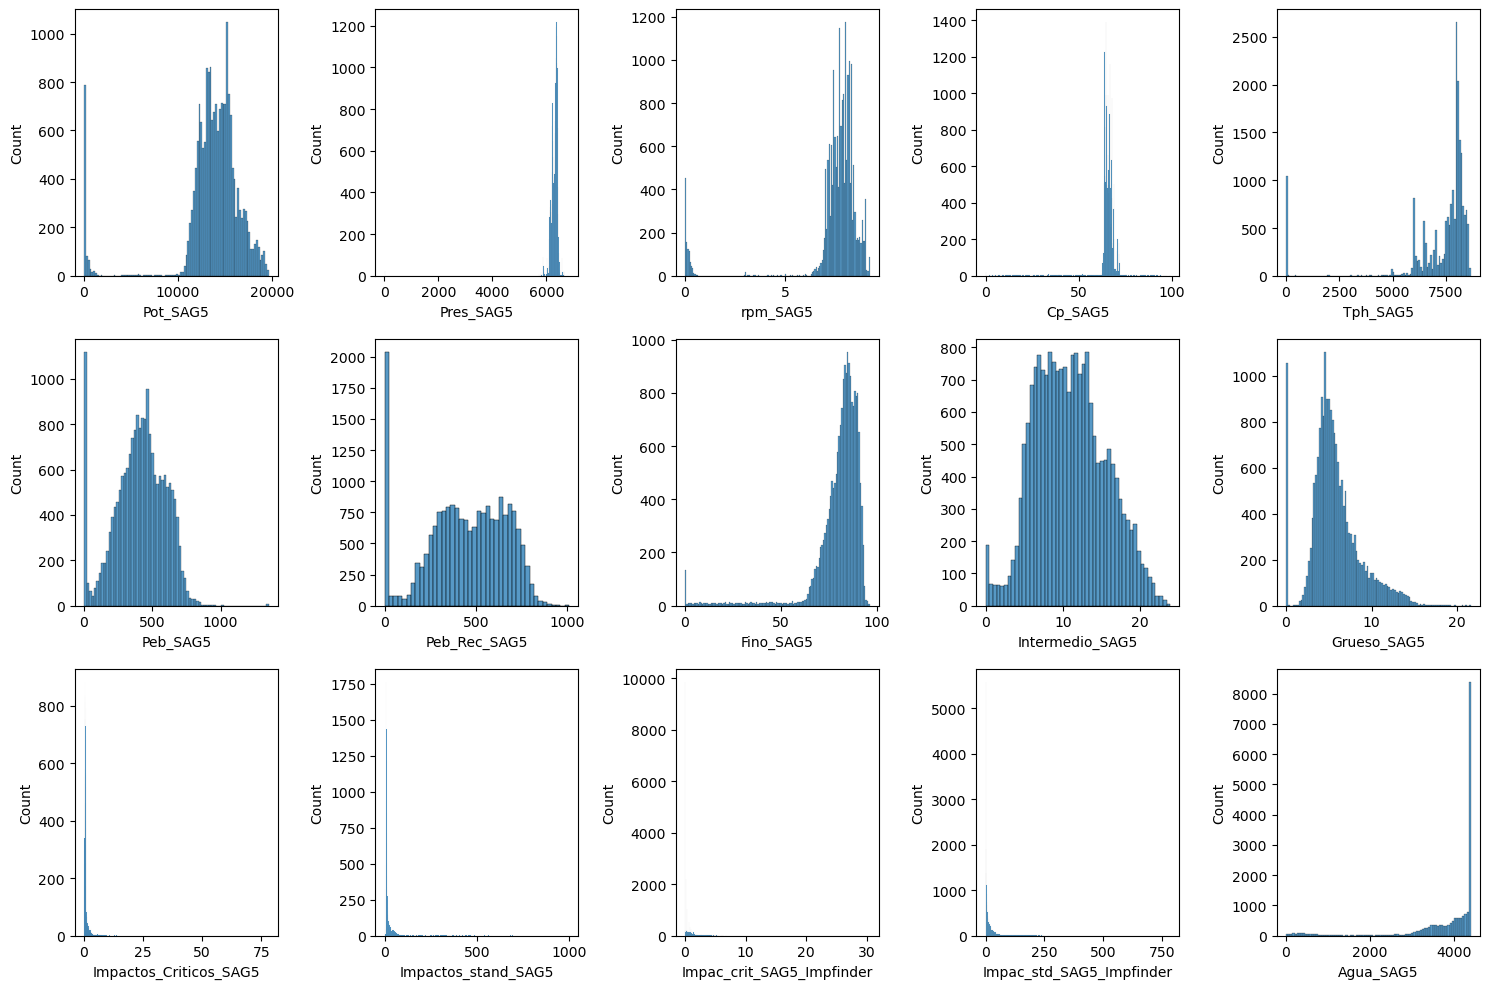

In [10]:
# Creamos la grilla de 3x5
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))

# Creamos una lista con los nombres de las variables continuas
vars = list(df_sag5.select_dtypes(include=['float64']).columns)

# Recorremos la lista y graficamos cada variable en la posición correspondiente de la grilla
for i, var in enumerate(vars):
    row = i // 5
    col = i % 5
    
    # Histograma
    sns.histplot(data=df_sag5, x=var, ax=ax[row][col])

plt.tight_layout()
plt.show()

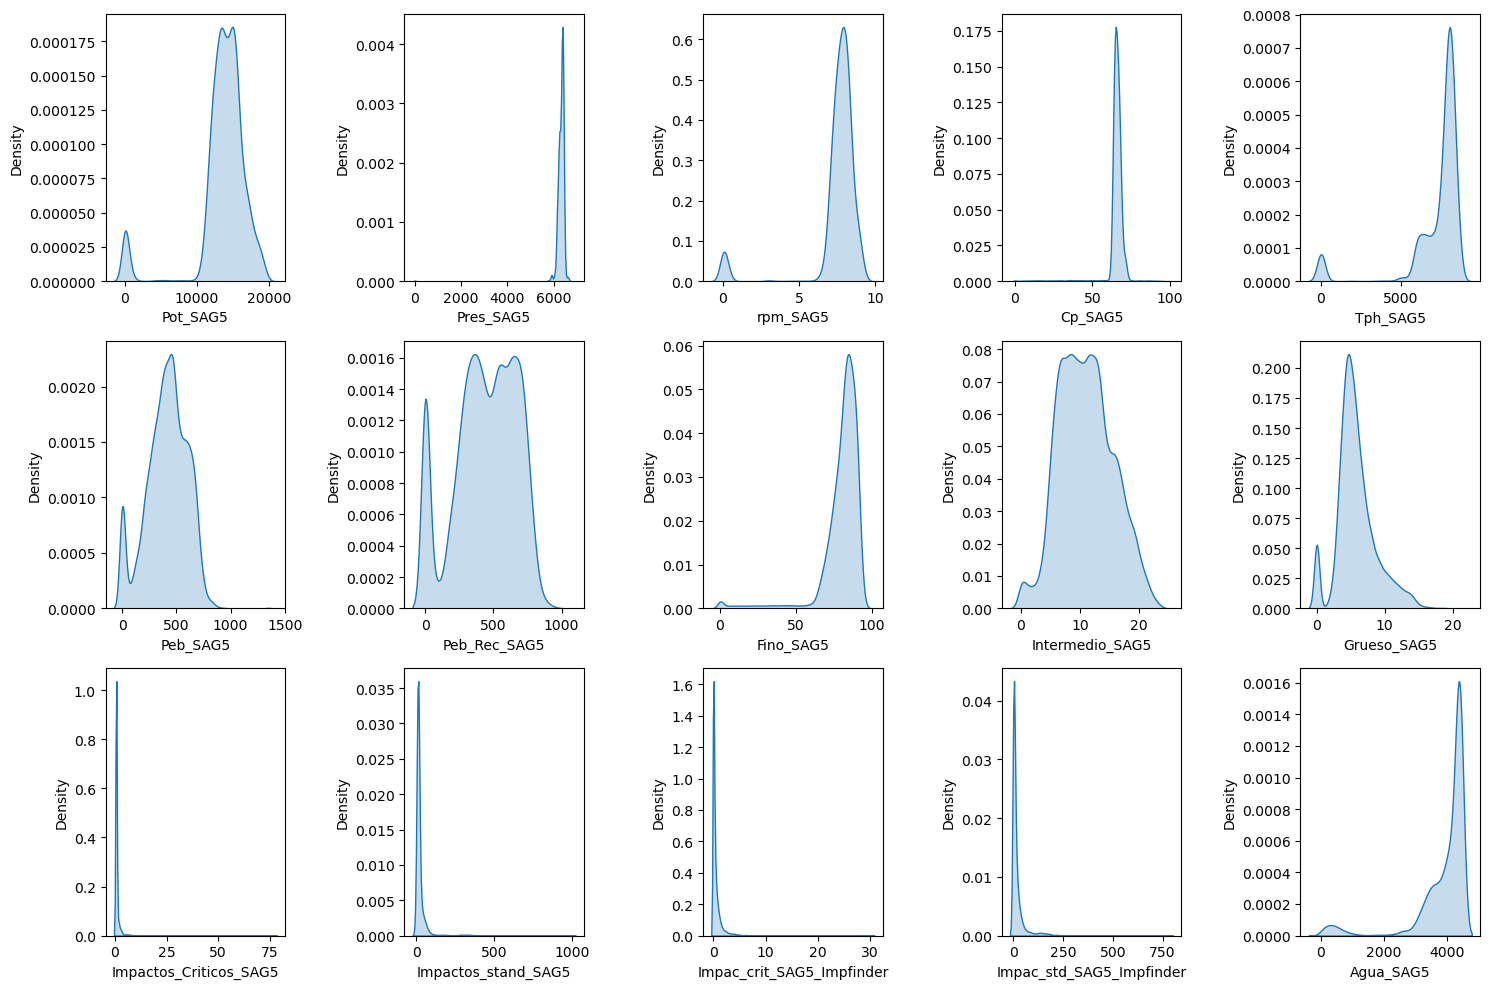

In [11]:
# Creamos la grilla de 3x5
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))

# Creamos una lista con los nombres de las variables continuas
vars = list(df_sag5.select_dtypes(include=['float64']).columns)

# Recorremos la lista y graficamos cada variable en la posición correspondiente de la grilla
for i, var in enumerate(vars):
    row = i // 5
    col = i % 5
    
    # Gráfico de densidad
    sns.kdeplot(data=df_sag5, x=var, shade=True, ax=ax[row][col])

plt.tight_layout()
plt.show()

Los graficos de densidad son equivalentes a los histogramas vistos anteriormente, se puede ver que nuestro vector objetivo muestra un desbalance importante.

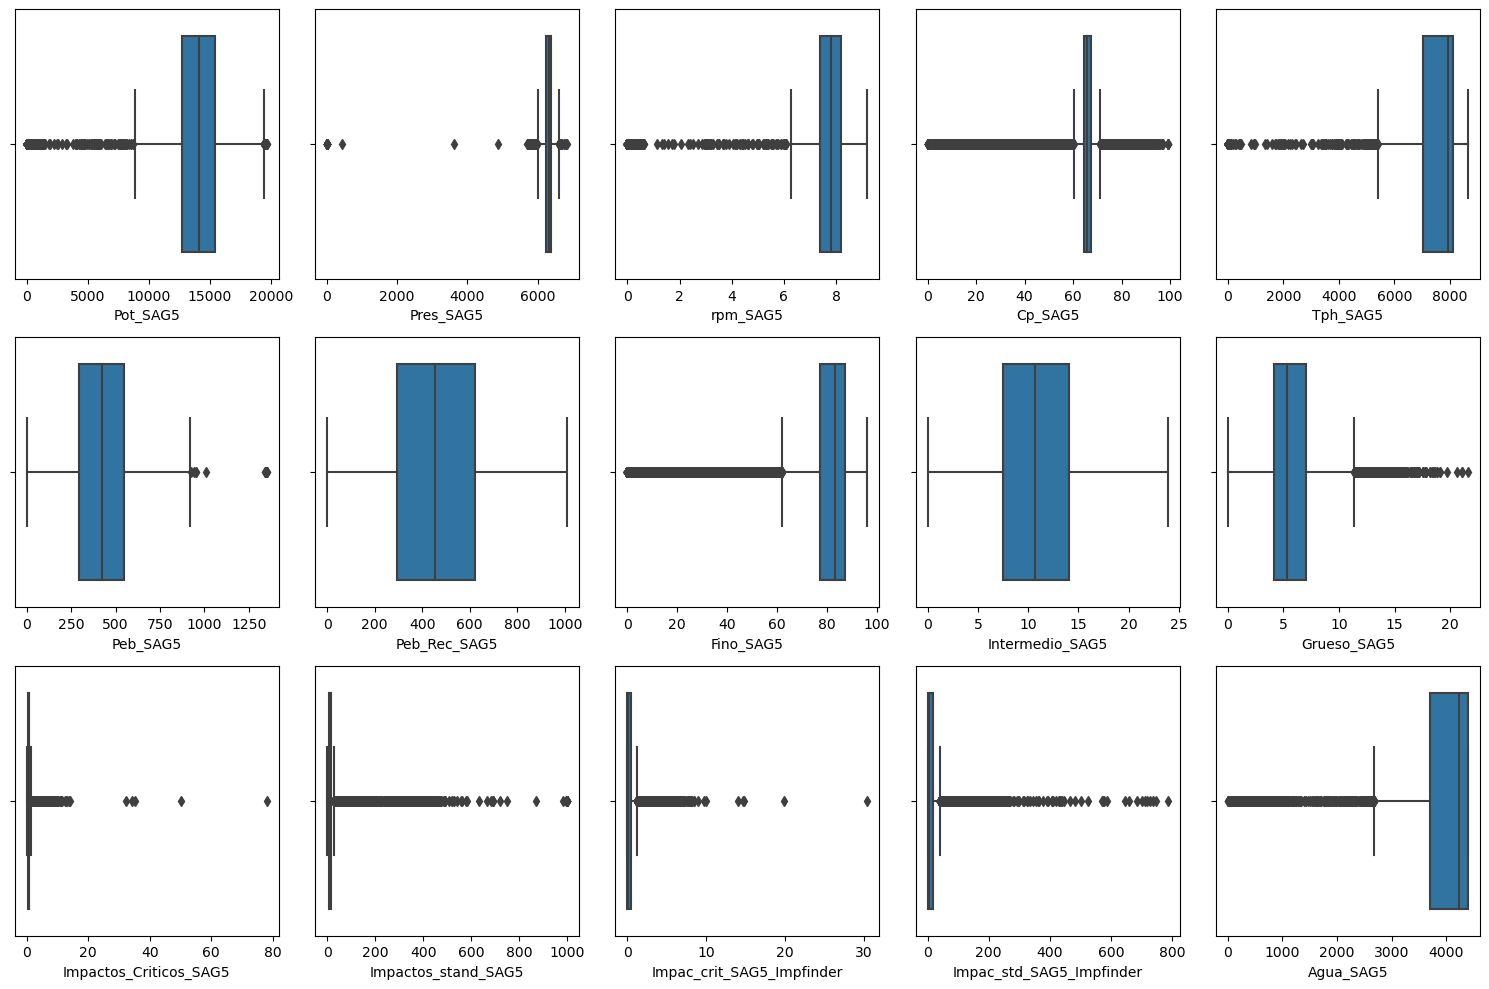

In [12]:
# Creamos la grilla de 3x5
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))

# Creamos una lista con los nombres de las variables continuas
vars = list(df_sag5.select_dtypes(include=['float64']).columns)

# Recorremos la lista y graficamos cada variable en la posición correspondiente de la grilla
for i, var in enumerate(vars):
    row = i // 5
    col = i % 5
    
    # Box plot
    sns.boxplot(data=df_sag5, x=var, ax=ax[row][col])

plt.tight_layout()
plt.show()

Los graficos de caja nos señalan previamente que existe bastantes datos atipicos en nuestra data, tanto como para nuestro vector objetivo como para las demás variables. 

In [13]:
df_sag5

,Pot_SAG5,Pres_SAG5,rpm_SAG5,Cp_SAG5,Tph_SAG5,Peb_SAG5,Peb_Rec_SAG5,Fino_SAG5,Intermedio_SAG5,Grueso_SAG5,Impactos_Criticos_SAG5,Impactos_stand_SAG5,Impac_crit_SAG5_Impfinder,Impac_std_SAG5_Impfinder,Agua_SAG5
0,16459.80,6400.84,8.62,68.66,8232.92,581.75,770.81,76.22,16.56,7.21,0.60,11.09,0.40,30.02,4112.68
1,16450.24,6385.75,8.60,68.57,8199.92,531.05,766.72,75.75,16.90,7.27,0.08,8.09,0.60,30.44,4132.34
2,16334.59,6392.67,8.58,68.77,8198.26,567.51,765.50,76.84,16.32,7.01,0.17,11.35,1.18,28.22,4086.69
3,16298.45,6387.79,8.56,68.62,8209.09,549.65,761.90,75.45,17.52,7.01,0.30,8.74,0.03,23.54,4104.58
4,16360.03,6392.99,8.56,68.70,8147.28,565.66,759.67,72.99,18.50,8.55,0.42,8.48,0.00,21.42,4084.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20011,14182.00,6248.44,7.70,64.87,7159.60,392.93,403.65,84.34,10.24,5.39,0.35,11.94,0.20,5.77,4094.47
20012,14279.60,6261.13,7.70,64.69,7226.09,399.99,405.85,84.42,10.50,5.08,0.60,12.01,0.06,5.85,4161.61
20013,14256.60,6264.52,7.70,64.58,7169.32,411.18,407.17,85.03,10.61,4.38,0.49,12.55,0.34,4.95,4159.66
20014,14278.30,6255.63,7.70,64.68,7162.36,395.24,399.30,85.18,10.74,4.09,0.43,11.75,0.06,4.48,4104.93


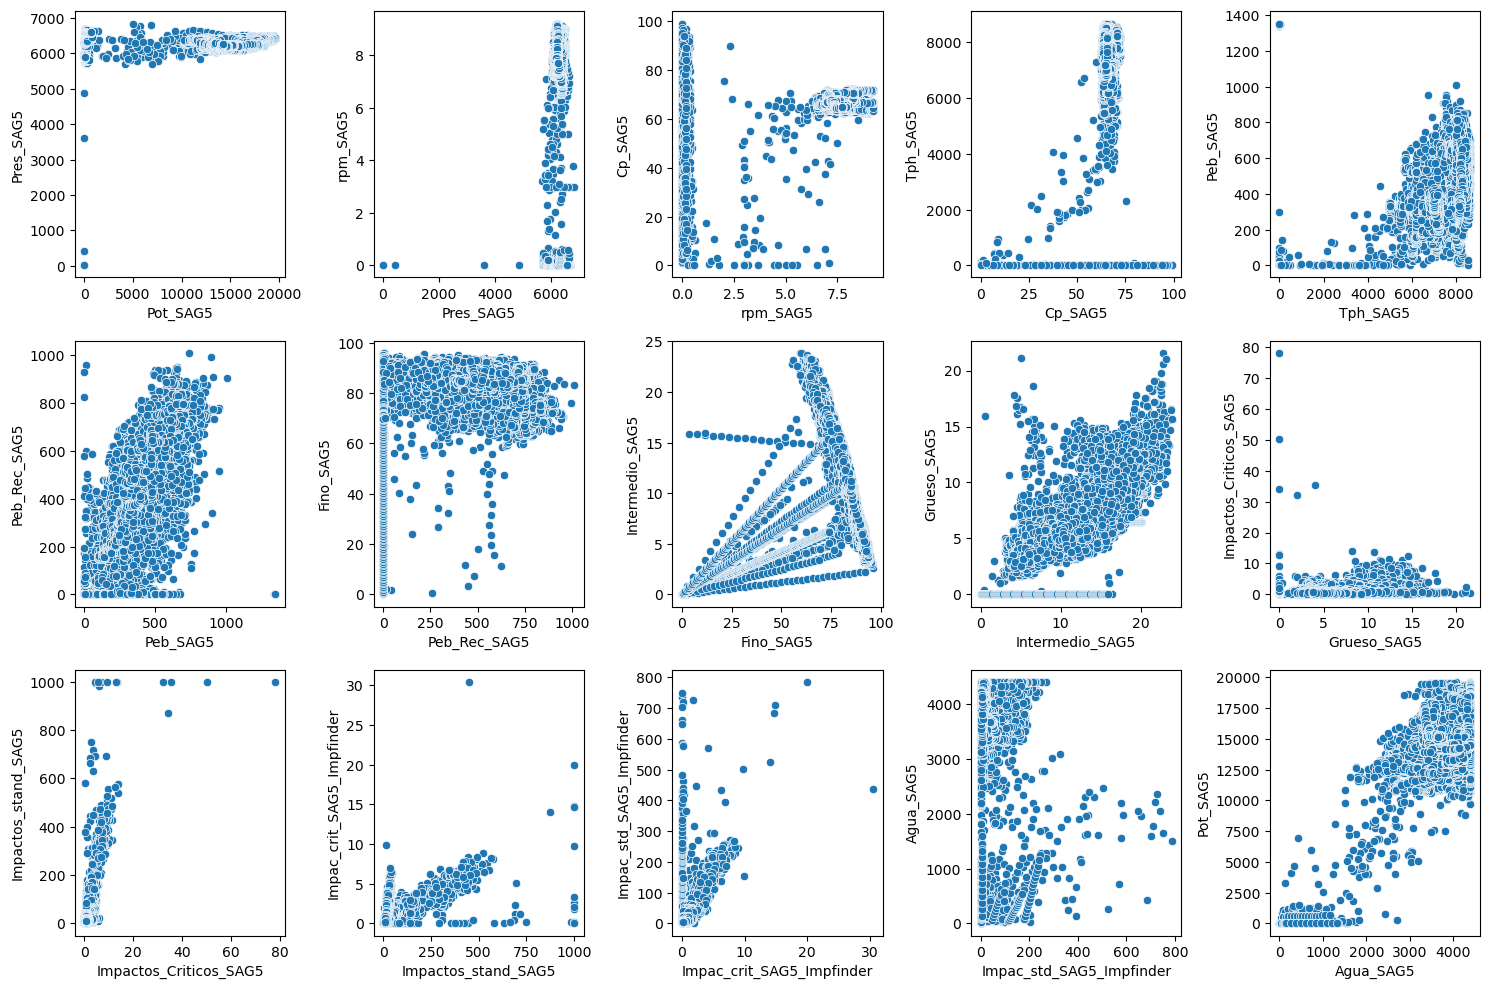

In [14]:
# Creamos la grilla de 3x5
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))

# Creamos una lista con los nombres de las variables continuas
vars = list(df_sag5.select_dtypes(include=['float64']).columns)

# Recorremos la lista y graficamos cada variable en la posición correspondiente de la grilla
for i, var in enumerate(vars):
    row = i // 5
    col = i % 5
    
    # Gráfico de dispersión
    sns.scatterplot(data=df_sag5, x=var, y=vars[(i+1)%len(vars)], ax=ax[row][col])

plt.tight_layout()
plt.show()

Se pueve observar que existe una relacion directamente proporcional entre nuestro vector objetivo y Pot_SAG5, Peb_SAG5 e intermedio_SAG5.


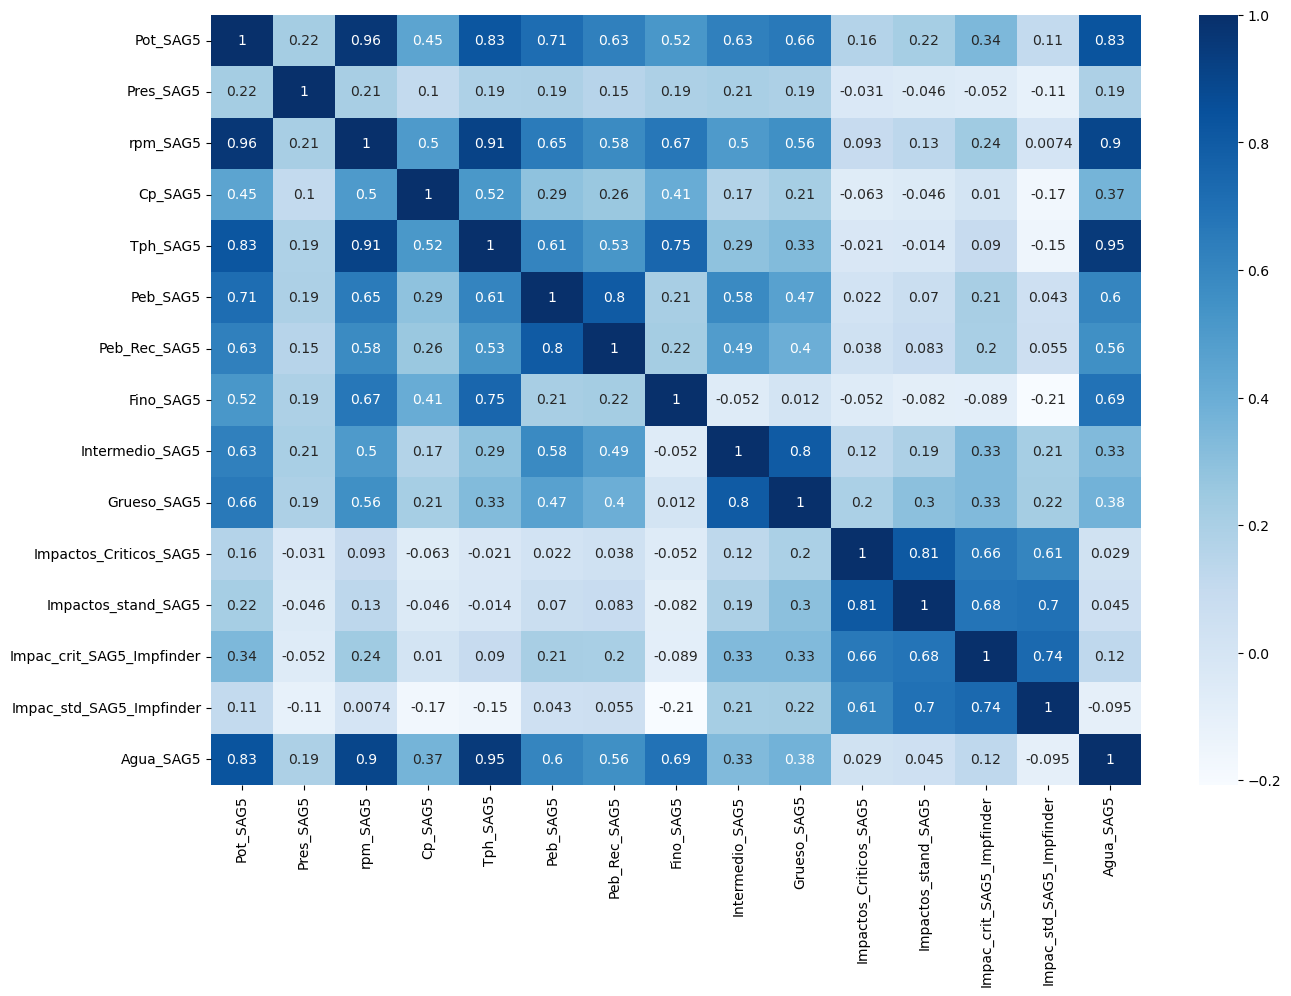

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df_sag5.corr(), cmap="Blues", annot=True);

La alta correlación de las variables con respescto a nuestro vector objetivo puede provocar inestabilidad en el modelo y hacer que sea difícil determinar el impacto de cada variable sobre la variable de respuesta.

Dicho esto, se eliminan todas las filas donde los valores de velocidad sean menores a 6 [rpm] y agua menor a 3000 [l.], puesto que se considera una parada por mantencion del equipo y no es representativo de la operacion de molienda

In [16]:
df_sag5 = df_sag5[df_sag5["rpm_SAG5"] > 6]
df_sag5 = df_sag5[df_sag5["Agua_SAG5"] > 3000]

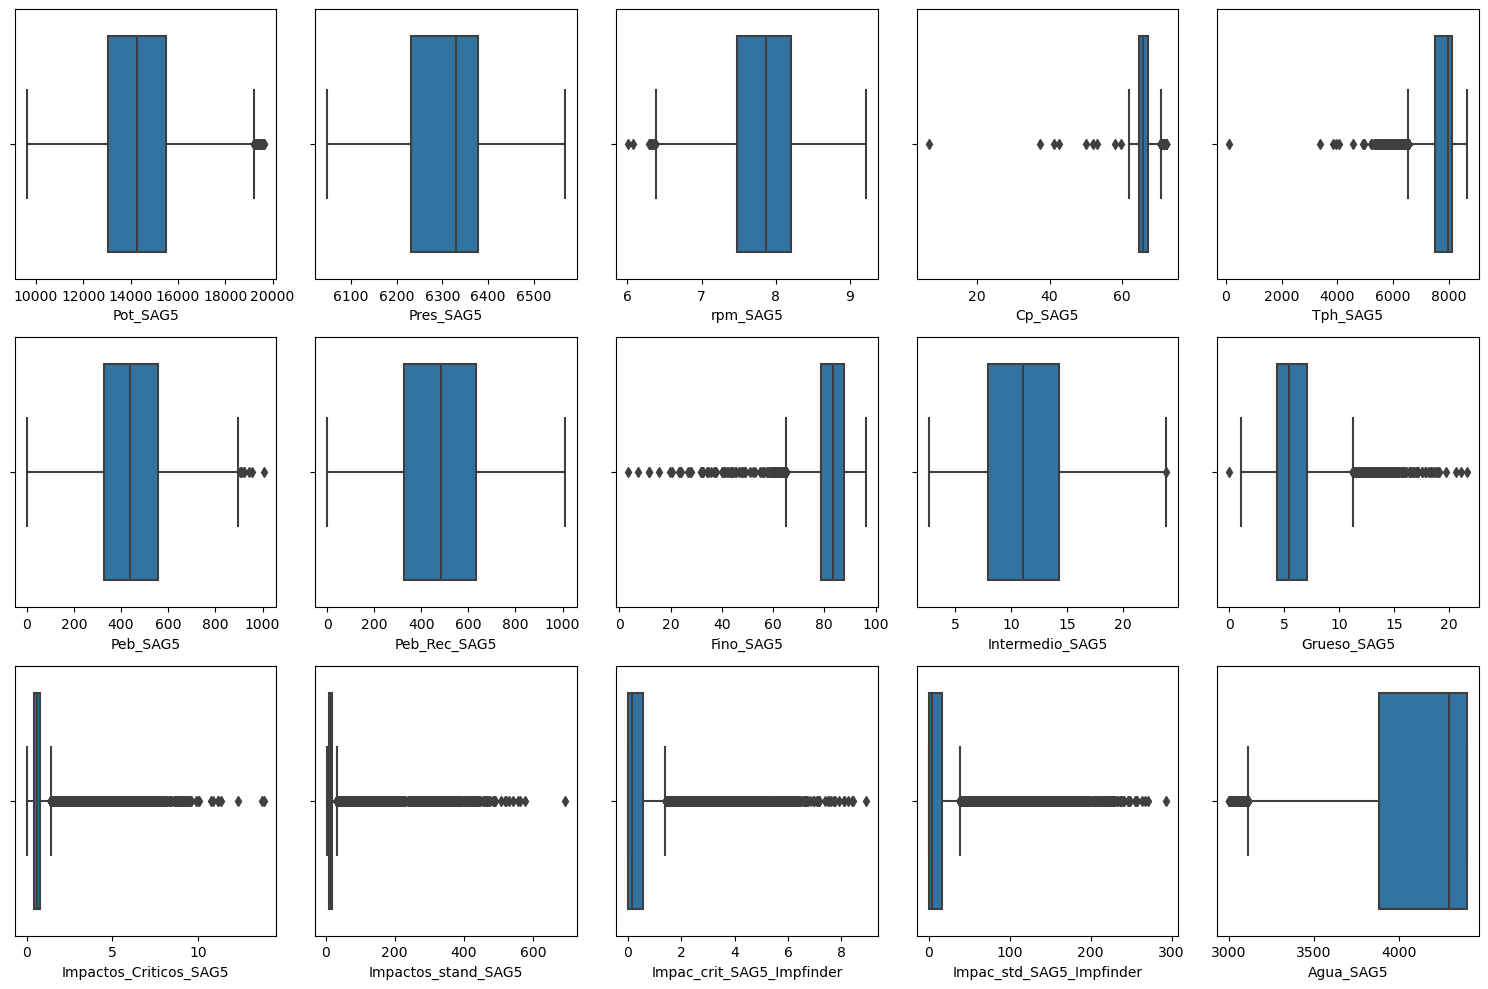

In [17]:
# Creamos la grilla de 3x5
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))

# Creamos una lista con los nombres de las variables continuas
vars = list(df_sag5.select_dtypes(include=['float64']).columns)

# Recorremos la lista y graficamos cada variable en la posición correspondiente de la grilla
for i, var in enumerate(vars):
    row = i // 5
    col = i % 5
    
    # Box plot
    sns.boxplot(data=df_sag5, x=var, ax=ax[row][col])

plt.tight_layout()
plt.show()

Eliminando los datos con las características señaladas anteriormente podemos observar que los datos atípicos se pueden ver fuertementes disminuidos, lo que nos permitirán alcanzar una mayor precisión en nuestro modelo.

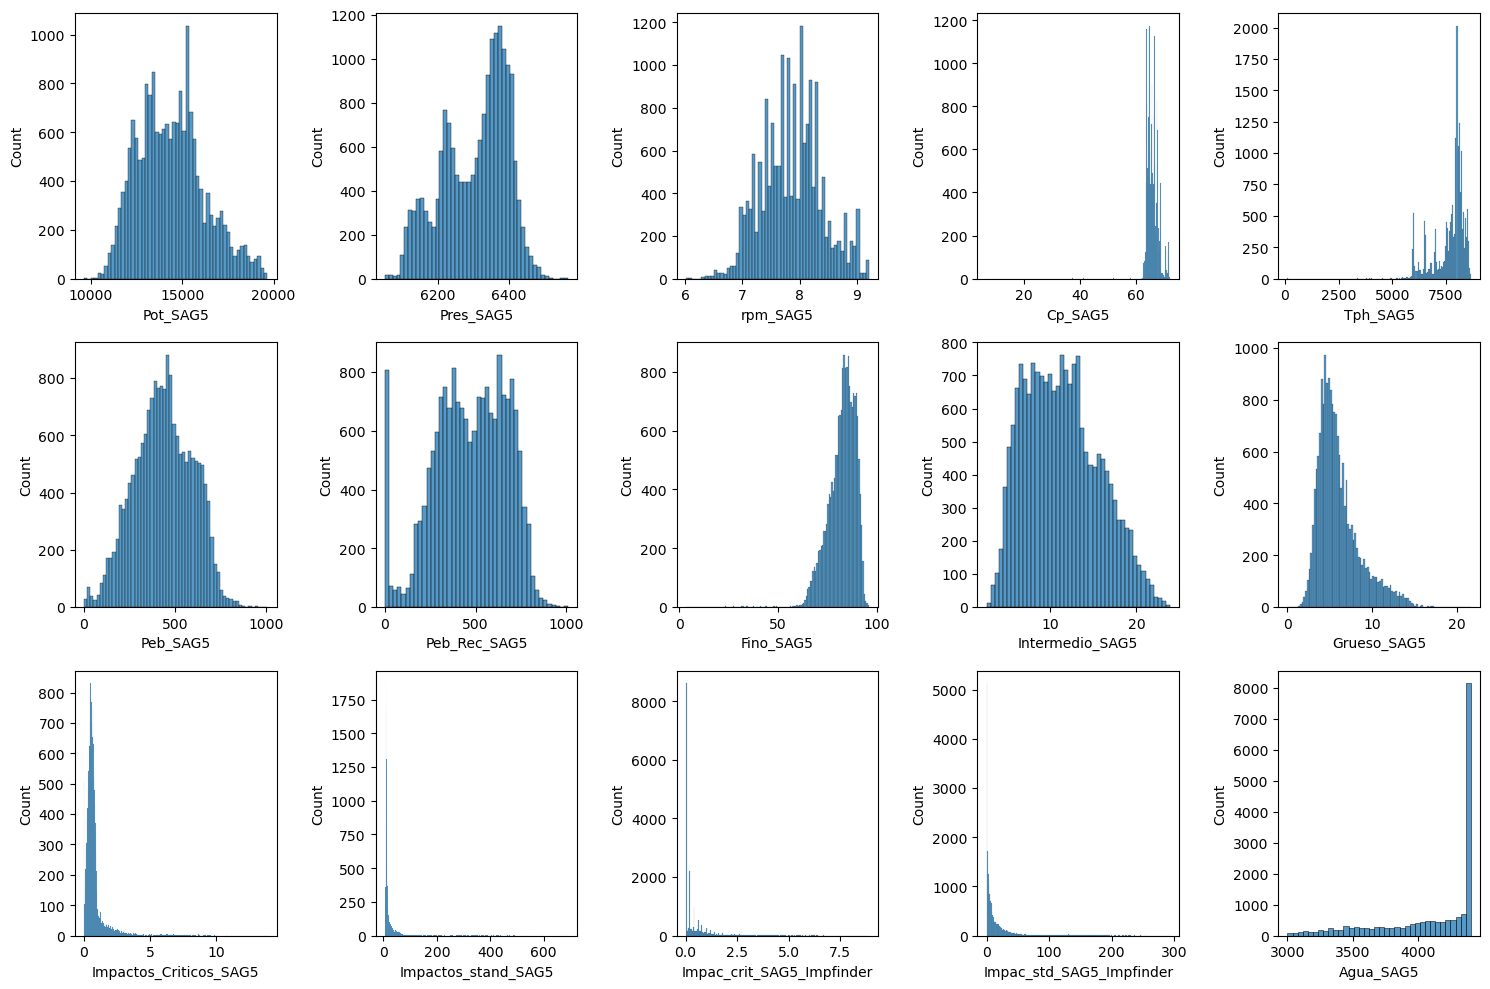

In [18]:
# Creamos la grilla de 3x5
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))

# Creamos una lista con los nombres de las variables continuas
vars = list(df_sag5.select_dtypes(include=['float64']).columns)

# Recorremos la lista y graficamos cada variable en la posición correspondiente de la grilla
for i, var in enumerate(vars):
    row = i // 5
    col = i % 5
    
    # Histograma
    sns.histplot(data=df_sag5, x=var, ax=ax[row][col])

plt.tight_layout()
plt.show()

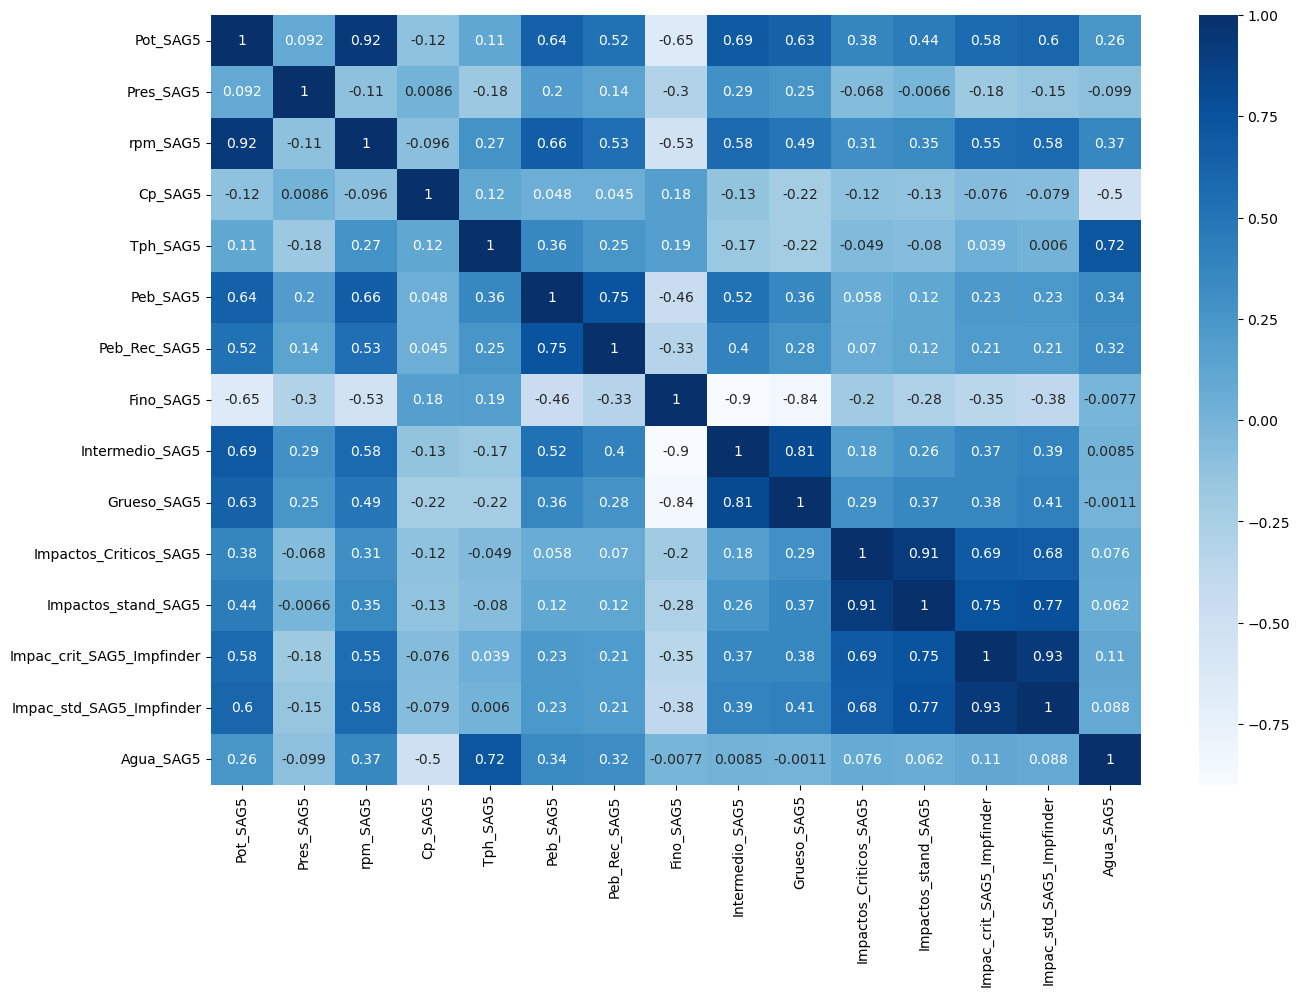

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df_sag5.corr(), cmap="Blues", annot=True);

Se puede observar en la matriz de correlación que solo 1 variable, tph_SAG5 (toneladas por hora), es la única que presenta una correlación alta con respecto a nuestra variable objetivo.
Cabe destacar que se modelará con y sin esta variable.

## ATRIBUTOS Y VECTOR OBJETIVO

Los atributos y el vector objetivo se presentan a continuación:


### MODELOS PREDICTIVOS ESCOGIDOS Y MÉTRICAS DE EVALUACIÓN

La data pre procesada y analizada se dividirá en dos conjuntos, el primero es el conjunto de entrenamiento, que corresponderá al 70% del total de los datos y permitirá entrenar los modelos. El segundo es el conjunto de testeo, que corresponderá al 30% del total de datos y permitirá evaluar el modelo predictivo.

Para llevar a cabo las predicciones del vector objetivo de este proyecto se utilizarán un total de cuatro modelos de regresión, en donde las métricas de desempeño para los cuatro serán el R2, error cuadrático medio (MSE), raíz del error cuadrático medio (RMSE) y el error absoluto medio (MAE). En base al resultado de las métricas de desempeño, se escogerá el que tenga los menores errores asociados para predecir el vector objetivo de concentración de sólidos de descarga.

Se utilizará como primer modelo el de Regresión Lineal de la librería SkLearn. Se espera que este modelo proporciona una primera aproximación sobre el comportamiento de las variables independientes en relación a las variables dependientes y cómo están interrelacionadas. De esta manera, se podrá establecer una base para la predicción de la variable objetivo, a partir de las métricas de desempeño obtenidas mediante este modelo.

El segundo modelo a emplear será el de Random Forest de la librería SkLearn. Este modelo se caracteriza por tener una mayor aleatoriedad en la selección de los atributos utilizados en cada árbol de decisión de regresión generado, lo que le otorga una gran robustez en la exploración de diferentes casos. No obstante, debido a esta aleatoriedad, la interpretación de los resultados obtenidos es baja y existe una tendencia al sobreajuste al basarse en árboles de decisión. Para obtener la mejor combinación de hiperparámetros, se utilizará una búsqueda de grilla que permita minimizar el error en la predicción.

El tercer modelo a utilizar será el Gradient Boosting Regression de la librería SkLearn. Este modelo se basa en la iteración de modelos anteriores, lo que le permite suavizar los errores a medida que se avanza en su proceso iterativo. Es crucial ajustar los hiperparámetros mediante la búsqueda en una grilla, para asegurarse de elegir los valores más óptimos. De esta manera, se busca minimizar el error en el modelo resultante que se utilizará para la predicción del vector objetivo.

El cuarto modelo a emplear será el de Máquinas de Soporte Vectorial de la librería de SkLearn. Este modelo es capaz de manejar múltiples hiperparámetros, los cuales pueden ser ajustados mediante una búsqueda en una grilla. A diferencia de otros modelos basados en árboles de decisión, la interpretabilidad de este modelo es mayor. Además, es adecuado para trabajar con variables que presentan comportamiento tanto lineal como no lineal. Normalmente, es posible reducir significativamente los errores obtenidos si se realiza una búsqueda adecuada de los hiperparámetros más apropiados.

El quinto es una técnica de regresión lineal regularizada que ayuda a predecir variables de respuesta al reducir el número de variables predictoras mediante la adición de una penalización en la suma de los valores absolutos de los coeficientes de las variables predictoras.

El sexto y ultimo modelo es una técnica llamada Lasso es una técnica de regresión lineal que utiliza la regularización L1 para reducir la complejidad del modelo y evitar el sobreajuste. Esto se logra al agregar un término de penalización a la función de costo que reduce los coeficientes de las variables menos importantes a cero, lo que simplifica el modelo y lo hace más interpretable. El parámetro de regularización controla el nivel de penalización aplicado a los coeficientes, lo que afecta la simplicidad y la capacidad predictiva del modelo. En resumen, el modelo Lasso es una técnica de regresión lineal que equilibra la simplicidad y la capacidad predictiva al seleccionar las variables más importantes y reducir la complejidad del modelo.


## Train Test Split

Se comenzará el proceso de modelación utilizando la técnica train test split, esto quiere decir que la X contendra el dataframe sin el vector objetivo, luego la "y", contemplará solo el vector objetivo. 
Es importante destacar que se entrenará solo 1/3 de la data.

In [20]:
X = df_sag5.drop("Agua_SAG5", axis=1)
y = df_sag5["Agua_SAG5"]

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=2207)

## StandardScalar

StandardScaler es una técnica de preprocesamiento de datos que se utiliza para estandarizar las características de los datos para mejorar el rendimiento del modelo y garantizar que todas las características tengan el mismo peso durante el entrenamiento.

In [21]:
scaler = StandardScaler()

scaler.fit(X_train)
scaler.fit(X_test)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [22]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(6101, 14)
(12386, 14)
(6101,)
(12386,)


# Modelos y resultados

A continuación, se describirá cómo se trabajará con los modelos previamente mencionados:



1.   Se utilizará la matriz de alta correlación, específicamente contiene la variable Tph_SAG5, que presenta una alta correlación con la variable objetivo, en todos los modelos tanto estandarizados como no estandarizados. Además, se probará con y sin intercepto en los modelos de regresión lineal. 

2.  Se repetirá el mismo proceso del punto 1, pero esta vez sin utilizar la variable Tph_SAG5, ya que se trabajará con baja correlación.


El objetivo de trabajar de esta manera es simplemente probar diferentes alternativas en busca de una solución óptima

## LR con y sin intercepto, sin estandarizar

In [24]:
model_sn_int = linreg.LinearRegression(fit_intercept=False, normalize=True)
model_cn_int = linreg.LinearRegression(fit_intercept=True, normalize=True)

lr_sn_int = model_sn_int.fit(X_train, y_train)
lr_cn_int = model_cn_int.fit(X_train, y_train)

lr_sn_int_yhat = lr_sn_int.predict(X_test)
lr_cn_int_yhat = lr_cn_int.predict(X_test)

print(f"Sin intercepto:\n{report_scores(y_test, lr_sn_int_yhat, 'lr_sn_int')}\n")
print(f"Con intercepto:\n{report_scores(y_test, lr_cn_int_yhat, 'lr_cn_int')}")

Sin intercepto:
MSE: 17768.911293945646
RMSE: 133.3000798722403
MAE: 101.37411243058698
R2: 0.876769446521622

Con intercepto:
MSE: 16454.67760745068
RMSE: 128.27578730006175
MAE: 93.61095713797835
R2: 0.8858838903897663


## LR con y sin intercepto y estandarizado

In [25]:
model_sn_int_std = linreg.LinearRegression(fit_intercept=False, normalize=True)
model_cn_int_std = linreg.LinearRegression(fit_intercept=True, normalize=True)

lr_sn_int_std = model_sn_int_std.fit(X_train_std, y_train)
lr_cn_int_std = model_cn_int_std.fit(X_train_std, y_train)

lr_sn_int_std_yhat = lr_sn_int_std.predict(X_test_std)
lr_cn_int_std_yhat = lr_cn_int_std.predict(X_test_std)

print(f"Sin intercepto:\n{report_scores(y_test, lr_sn_int_std_yhat, 'lr_sn_int_std')}\n")
print(f"Con intercepto:\n{report_scores(y_test, lr_cn_int_std_yhat, 'lr_cn_int_std')}")

Sin intercepto:
MSE: 16862228.33417033
RMSE: 4106.364369386907
MAE: 4098.865393762045
R2: -115.94254623279085

Con intercepto:
MSE: 16454.67760745069
RMSE: 128.27578730006178
MAE: 93.61095713797837
R2: 0.8858838903897662


## RFR

### Sin estandarizar

In [26]:
# Crear el modelo de Random Forest
rf_model = RFR(n_estimators=100, random_state=2208)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar las predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Reporte de metricas
print(f"{report_scores(y_test, y_pred, 'rf_model')}")

MSE: 514.2000550915354
RMSE: 22.67597969419481
MAE: 12.931298934600905
R2: 0.9964339313568901


### Con estandarizar

In [27]:
# Crear el modelo de Random Forest
rf_model_std = RFR(n_estimators=100, random_state=2208)

# Entrenar el modelo
rf_model_std.fit(X_train_std, y_train)

# Realizar las predicciones en el conjunto de prueba
y_pred_std = rf_model.predict(X_test_std)

# Reporte de metricas
print(f"{report_scores(y_test, y_pred_std, 'rf_model_std')}")

MSE: 674802.4691949886
RMSE: 821.4636140420272
MAE: 750.5993219308306
R2: -3.6798748888913746


## SVM

### Sin estandarizar

In [28]:
# Crear el modelo de SVM
svm_model = SVR(kernel='rbf', C=1.0, gamma='scale')

# Entrenar el modelo
svm_model.fit(X_train, y_train)

# Realizar las predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Reporte de metricas
print(f"{report_scores(y_test, y_pred, 'svm_model')}")

MSE: 156053.72583990463
RMSE: 395.03636014916987
MAE: 265.68664002344366
R2: -0.08226028536519814


### Con estandarizar

In [29]:
# Crear el modelo de SVM
svm_model_std = SVR(kernel='rbf', C=1.0, gamma='scale')

# Entrenar el modelo
svm_model_std.fit(X_train_std, y_train)

# Realizar las predicciones en el conjunto de prueba
y_pred_std = svm_model_std.predict(X_test)

# Reporte de metricas
print(f"{report_scores(y_test, y_pred_std, 'svm_model_std')}")

MSE: 144382.5666972628
RMSE: 379.97706075138643
MAE: 311.42562917213314
R2: -0.0013187252949404815


## GBR

### Sin estandarizacion

In [30]:
# Crear el modelo de Gradient Boosting
gb_model = GBR(n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Realizar las predicciones en el conjunto de prueba
y_pred = gb_model.predict(X_test)

# Reporte de metricas
print(f"{report_scores(y_test, y_pred, 'gb_model')}")

MSE: 1511.2998138285616
RMSE: 38.87543972521162
MAE: 27.590167885001343
R2: 0.989518867563185


### Con estandarizacion

In [31]:
# Crear el modelo de Gradient Boosting
gb_model_std = GBR(n_estimators=100, learning_rate=0.1, random_state=2208)

# Entrenar el modelo
gb_model_std.fit(X_train_std, y_train)

# Realizar las predicciones en el conjunto de prueba
y_pred_std = gb_model_std.predict(X_test_std)

# Reporte de metricas
print(f"{report_scores(y_test, y_pred_std, 'gb_model_std')}")

MSE: 1514.797771050664
RMSE: 38.920403017577605
MAE: 27.59550412031251
R2: 0.9894946086090266


## Lasso

### Sin estandarizacion

In [32]:
# inicializar el modelo de regresión Lasso con un valor de alpha de 0.1
lasso = Lasso(alpha=0.1)

# entrenar el modelo con los datos de entrenamiento
lasso = lasso.fit(X_train, y_train)

# hacer predicciones en los datos de prueba
y_pred_lasso = lasso.predict(X_test)

# Reporte de metricas
print(f"{report_scores(y_test, y_pred_lasso, 'lasso')}")

MSE: 16451.00520498238
RMSE: 128.2614720209556
MAE: 93.62604480094002
R2: 0.8859093591526679


### Con estandarizacion

In [33]:
# inicializar el modelo de regresión Lasso con un valor de alpha de 0.1
lasso = Lasso(alpha=0.1)

# entrenar el modelo con los datos de entrenamiento
lasso_std = lasso.fit(X_train_std, y_train)

# hacer predicciones en los datos de prueba
y_pred_lasso_std = lasso.predict(X_test_std)

# Reporte de metricas
print(f"{report_scores(y_test, y_pred_std, 'lasso_std')}")

MSE: 1514.797771050664
RMSE: 38.920403017577605
MAE: 27.59550412031251
R2: 0.9894946086090266


## Se eliminan variables con alta correlación

Para esta tanda de modelos, se elimina la variable "Tph_SAG5" que es la unica con una correlacion sobre 0.7. Luego se entrenan los modelos antes declarados con el nuevo dataframe.

In [34]:
X_lowcorr = df_sag5.drop(["Tph_SAG5", "Agua_SAG5"], axis=1)
y_lowcorr = df_sag5["Agua_SAG5"]

In [35]:
X_train_lowcorr, X_test_lowcorr, y_train_lowcorr, y_test_lowcorr = tts(X_lowcorr, y_lowcorr, test_size=0.33, random_state=2207)

In [36]:
scaler.fit(X_train_lowcorr)
scaler.fit(X_test_lowcorr)

X_train_lowcorr_std = scaler.transform(X_train_lowcorr)
X_test_lowcorr_std = scaler.transform(X_test_lowcorr)

## LR con y sin intercepto - baja correlacion

### Sin estandarizar

In [37]:
model_sn_int_lowcorr = linreg.LinearRegression(fit_intercept=False, normalize=True)
model_cn_int_lowcorr = linreg.LinearRegression(fit_intercept=True, normalize=True)

model_sn_int_lowcorr.fit(X_train_lowcorr, y_train_lowcorr)
model_cn_int_lowcorr.fit(X_train_lowcorr, y_train_lowcorr)

model_sn_int_yhat_lowcorr = model_sn_int_lowcorr.predict(X_test_lowcorr)
model_cn_int_yhat_lowcorr = model_cn_int_lowcorr.predict(X_test_lowcorr)

print(f"Sin intercepto:\n{report_scores(y_test_lowcorr, model_sn_int_yhat_lowcorr, 'lr_sn_int_lowcorr')}\n")
print(f"Con intercepto:\n{report_scores(y_test_lowcorr, model_cn_int_yhat_lowcorr, 'lr_cn_int_lowcorr')}")

Sin intercepto:
MSE: 69601.13261140374
RMSE: 263.8202657329488
MAE: 199.32873913410685
R2: 0.5173037924193091

Con intercepto:
MSE: 68503.53894356475
RMSE: 261.73180728288406
MAE: 192.03652069776402
R2: 0.5249157993084566


### Con estandarizar

In [38]:
model_sn_int_lowcorr_std = linreg.LinearRegression(fit_intercept=False, normalize=True)
model_cn_int_lowcorr_std = linreg.LinearRegression(fit_intercept=True, normalize=True)

model_sn_int_lowcorr_std.fit(X_train_lowcorr_std, y_train_lowcorr)
model_cn_int_lowcorr_std.fit(X_train_lowcorr_std, y_train_lowcorr)

model_sn_int_yhat_lowcorr_std = model_sn_int_lowcorr_std.predict(X_test_lowcorr_std)
model_cn_int_yhat_lowcorr_std = model_cn_int_lowcorr_std.predict(X_test_lowcorr_std)

print(f"Sin intercepto:\n{report_scores(y_test_lowcorr, model_sn_int_yhat_lowcorr_std, 'lr_sn_int_lowcorr_std')}\n")
print(f"Con intercepto:\n{report_scores(y_test_lowcorr, model_cn_int_yhat_lowcorr_std, 'lr_cn_int_lowcorr_std')}")

Sin intercepto:
MSE: 16915841.058505002
RMSE: 4112.887192533367
MAE: 4099.968885061477
R2: -116.31435999132407

Con intercepto:
MSE: 68503.53894356472
RMSE: 261.731807282884
MAE: 192.03652069776402
R2: 0.5249157993084566


## RFR baja correlacion

### Sin estandarizar

In [39]:
# Crear el modelo de Random Forest
rf_model_lowcorr = RFR(n_estimators=100, random_state=2208)

# Entrenar el modelo
rf_model_lowcorr = rf_model_lowcorr.fit(X_train_lowcorr, y_train_lowcorr)

# Realizar las predicciones en el conjunto de prueba
y_pred_rf_lowcorr = rf_model_lowcorr.predict(X_test_lowcorr)

# Reporte de metricas
print(f"{report_scores(y_test_lowcorr, y_pred_rf_lowcorr, 'rf_model_lowcorr')}")

MSE: 14741.410843430602
RMSE: 121.41421186760059
MAE: 62.13486562858545
R2: 0.8977656994715777


### Con estandarizar

In [40]:
# Crear el modelo de Random Forest
rf_model_lowcorr_std = RFR(n_estimators=100, random_state=2208)

# Entrenar el modelo
rf_model_lowcorr_std = rf_model_lowcorr_std.fit(X_train_lowcorr_std, y_train_lowcorr)

# Realizar las predicciones en el conjunto de prueba
y_pred_rf_lowcorr_std = rf_model_lowcorr_std.predict(X_test_lowcorr_std)

# Reporte de metricas
print(f"{report_scores(y_test_lowcorr, y_pred_rf_lowcorr_std, 'rf_model_lowcorr_std')}")

MSE: 14756.581935360615
RMSE: 121.47667239170084
MAE: 62.13196333387967
R2: 0.8976604852564534


## SVM baja correlacion

### Sin estandarizar

In [41]:
# Crear el modelo de SVM
svm_model_lowcorr = SVR(kernel='rbf', C=1.0, gamma='scale')

# Entrenar el modelo
svm_model_lowcorr.fit(X_train_lowcorr, y_train_lowcorr)

# Realizar las predicciones en el conjunto de prueba
y_pred_lowcorr = svm_model_lowcorr.predict(X_test_lowcorr)

# Reporte de metricas
print(f"{report_scores(y_test_lowcorr, y_pred_lowcorr, 'svm_model_lowcorr')}")

MSE: 169881.88640462147
RMSE: 412.1673039005174
MAE: 278.8743978479179
R2: -0.17816103312561715


### Con estandarizar

In [42]:
# Crear el modelo de SVM
svm_model_lowcorr_std = SVR(kernel='rbf', C=1.0, gamma='scale')

# Entrenar el modelo
svm_model_lowcorr_std.fit(X_train_lowcorr_std, y_train_lowcorr)

# Realizar las predicciones en el conjunto de prueba
y_pred_lowcorr_std = svm_model_lowcorr_std.predict(X_test_lowcorr_std)

# Reporte de metricas
print(f"{report_scores(y_test_lowcorr, y_pred_lowcorr_std, 'svm_model_lowcorr_std')}")

MSE: 89877.77837670574
RMSE: 299.7962280895237
MAE: 197.8234323998924
R2: 0.37668165530534026


## GBR baja correlacion

### Sin estandarizar

In [43]:
# Crear el modelo de Gradient Boosting
gb_model_lowcorr = GBR(n_estimators=100, learning_rate=0.1, random_state=2208)

# Entrenar el modelo
gb_model_lowcorr.fit(X_train_lowcorr, y_train_lowcorr)

# Realizar las predicciones en el conjunto de prueba
y_pred_lowcorr = gb_model_lowcorr.predict(X_test_lowcorr)

# Reporte de metricas
print(f"{report_scores(y_test_lowcorr, y_pred_lowcorr, 'gb_model_lowcorr')}")

MSE: 32040.980049705264
RMSE: 178.99994427291105
MAE: 122.01687641625848
R2: 0.7777901166707841


### Con estandarizar

In [44]:
# Crear el modelo de Gradient Boosting
gb_model_lowcorr_std = GBR(n_estimators=100, learning_rate=0.1, random_state=2208)

# Entrenar el modelo
gb_model_lowcorr_std.fit(X_train_lowcorr_std, y_train_lowcorr)

# Realizar las predicciones en el conjunto de prueba
y_pred_lowcorr_std = gb_model_lowcorr_std.predict(X_test_lowcorr_std)

# Reporte de metricas
print(f"{report_scores(y_test_lowcorr, y_pred_lowcorr_std, 'gb_model_lowcorr_std')}")

MSE: 32048.43115323015
RMSE: 179.02075620784913
MAE: 122.02460754992138
R2: 0.7777384419454052


## Lasso

### Sin estandarizacion

In [45]:
# inicializar el modelo de regresión Lasso con un valor de alpha de 0.1
lasso_lowcorr = Lasso(alpha=0.1)

# entrenar el modelo con los datos de entrenamiento
lasso_lowcorr = lasso_lowcorr.fit(X_train_lowcorr_std, y_train_lowcorr)

# hacer predicciones en los datos de prueba
y_pred_lowcorr_std = lasso_lowcorr.predict(X_test_lowcorr_std)

# Reporte de metricas
print(f"{report_scores(y_test_lowcorr, y_pred_lowcorr_std, 'lasso_lowcorr')}")

MSE: 68511.26620368344
RMSE: 261.7465686569424
MAE: 192.03310610621406
R2: 0.5248622093880869


### Con estandarizacion

In [46]:
# inicializar el modelo de regresión Lasso con un valor de alpha de 0.1
lasso_lowcorr_std = Lasso(alpha=0.1)

# entrenar el modelo con los datos de entrenamiento
lasso_lowcorr_std = lasso_lowcorr_std.fit(X_train_lowcorr_std, y_train_lowcorr)

# hacer predicciones en los datos de prueba
y_pred_lowcorr_std = lasso_lowcorr_std.predict(X_test_lowcorr_std)

# Reporte de metricas
print(f"{report_scores(y_test_lowcorr, y_pred_lowcorr_std, 'lasso_lowcorr_std')}")

MSE: 68511.26620368344
RMSE: 261.7465686569424
MAE: 192.03310610621406
R2: 0.5248622093880869


## Resultados de modelos

A continuación se presenta el dataframe con los resultados MSE, RMSE, MAE y R2 de todos los modelos antes evaluados:

In [47]:
resultados.sort_values("Model")

,Model,MSE,RMSE,MAE,R2


Es importante destacar que se aplicará un filtro a los modelos, seleccionando aquellos que presenten un R2 mayor a 0.7 y menor a 0.9. El objetivo de esta medida es eliminar los modelos sobreajustados y aquellos que presenten una baja precisión en la predicción de los datos.
A continuacion se presentan dichos modelos ordenados en funciona a su MSE:

In [48]:
resultados[(resultados["R2"] < 0.9) & (resultados["R2"] > 0.7)].sort_values("MSE")

,Model,MSE,RMSE,MAE,R2


Finalmente se seleccionaron 2 modelos para nuestro proyecto. Éstos son "rf_model_lowcorr" y "lr_cn_int". 

En general todos los modelos presentados en la tabla anterior son sumamente parecidos, no obstante decidimos quedarnos con uno de Regresion Logistica basandonos en tener un modelo menos costoso al momento de procesarlo, y un modelo de Random Forest ya que es de los que presentaron mejor resultado; tambien se evitaron modelos que necesiten la estandarizacion de la data previa, para ahorrar un paso adicional en el procesamiento.

A continuacion se presentan los graficos comparativos entre los datos predichos y los reales:

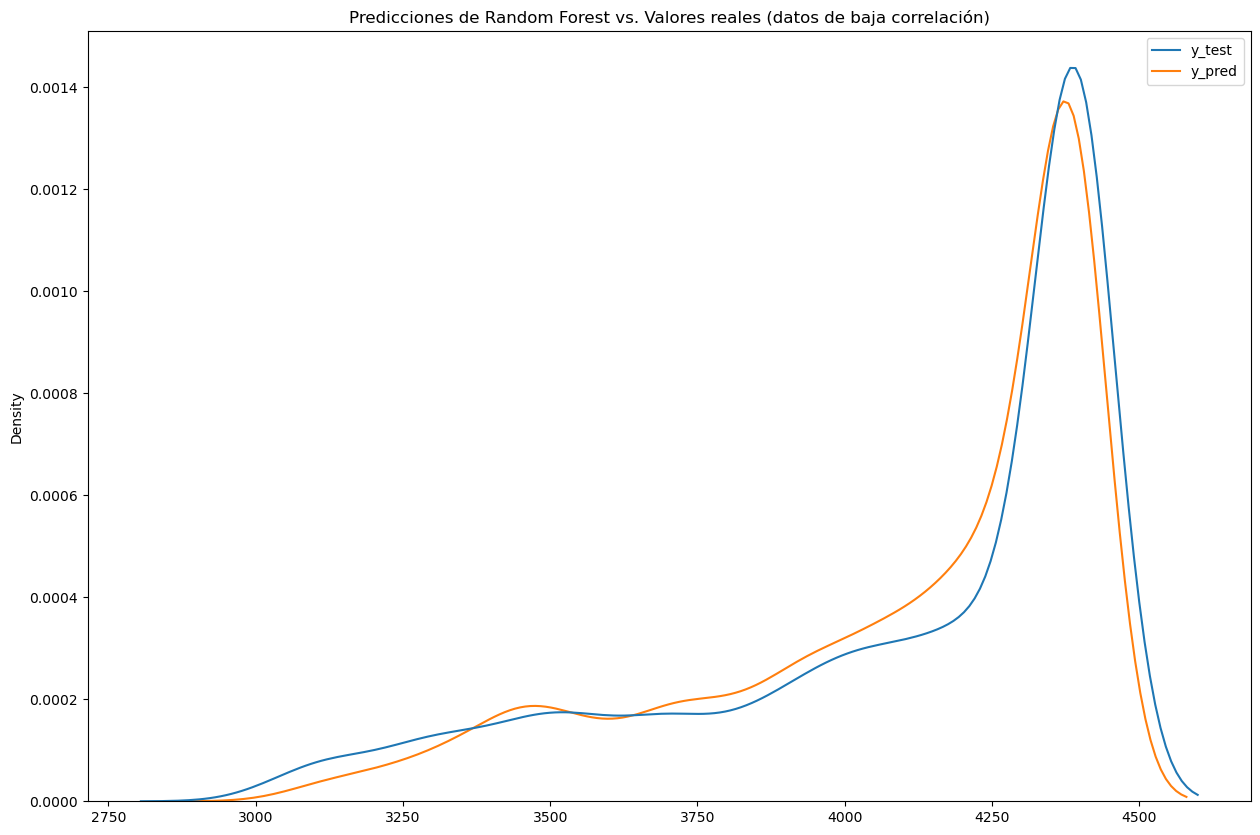

In [49]:
test_vs_pred(y_test_lowcorr, y_pred_rf_lowcorr, "Predicciones de Random Forest vs. Valores reales (datos de baja correlación)")

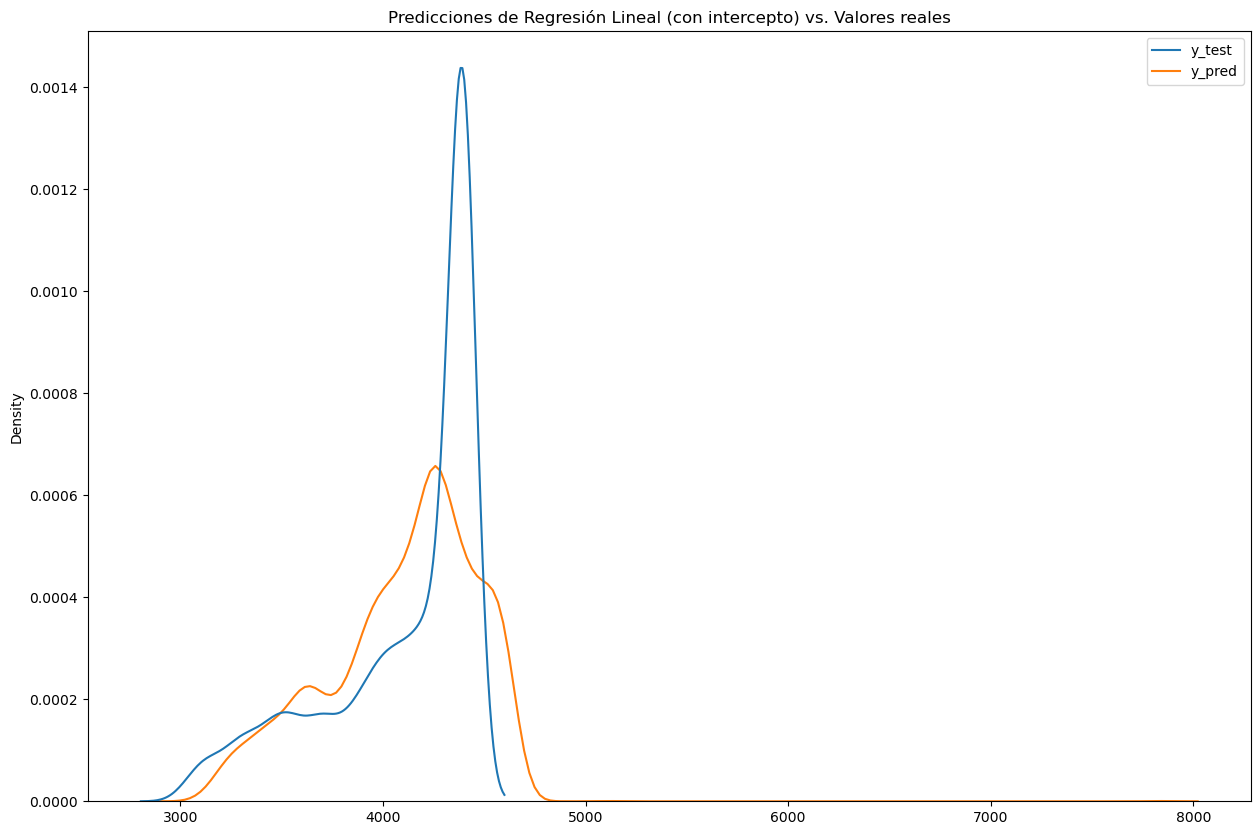

In [50]:
test_vs_pred(y_test, lr_cn_int_yhat, "Predicciones de Regresión Lineal (con intercepto) vs. Valores reales")

## Serializacion de modelos seleccionados

A continuacion se serializan los modelos seleccionados para poder ser utilizados en la GUI que sera presentada al cliente:

In [51]:
pickle.dump(rf_model_lowcorr, open('rf_model_lowcorr.sav', 'wb')) 

pickle.dump(lr_cn_int, open('lr_cn_int.sav', 'wb'))